In [2]:
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt
%matplotlib inline
import sklearn.datasets as sk_datasets

import random as rnd
import os
import math

# required for interactive plotting
from __future__ import print_function
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
import numpy.polynomial as np_poly

from IPython.display import Math
from IPython.display import Latex
from IPython.display import HTML

from pprint import pprint
import functools as ft

DIR_HOME = os.environ['HOME']
DIR_REPOS = DIR_HOME + "/neo-human/repos"
DIR_BMLSP = DIR_REPOS + "/luispedro/BuildingMachineLearningSystemsWithPython"

In [3]:
# turn off ticks
# axis=axis_name,          # changes apply to the x-axis
#         which='both',      # both major and minor ticks are affected
#         bottom='off',      # ticks along the bottom edge are off
#         top='off',         # ticks along the top edge are off
#         labelbottom='off') # labels along the bottom edge are off
def turn_off_ticks(axis_name='x'):
    if(axis_name=='x' or axis_name=='both'):
        plt.tick_params(axis='x', which='both', bottom='off', top='off', labelbottom='off')
    if(axis_name=='y' or axis_name=='both'):
        plt.tick_params(axis='y', which='both',left='off', right='off', labelleft='off')
    

initialization
$
\newcommand{\Brace}[1]{\left\{#1\right\}}
\newcommand{\Bracket}[1]{\left[#1\right]}
\newcommand{\cases}[1]{\begin{cases}#1\end{cases}}
\newcommand{\cov}[1]{\text{cov} \sigma\left[#1\right]}
\newcommand{\diff}[2]{\frac{d #1}{d #2}}
\newcommand{\difftwo}[2]{\frac{d^2 #1}{d {#2}^2}}
\newcommand{\diffn}[2]{{#1}^{\prime}(#2)}
\newcommand{\ds}{\displaystyle}
\newcommand{\E}[1]{\mathbb{E}\left[ #1 \right]}
\newcommand{\expb}[1]{\exp\left\{#1\right\}} 
\newcommand{\EXP}[1]{\exp\left\{#1\right\}} 
\newcommand{\frachalf}[1]{\frac{#1}{2}~}
\newcommand{\fracone}[1]{\frac{1}{#1}~}
\newcommand{\fracrec}[1]{\frac{1}{#1}~}
\newcommand{\half}{\fracone{2}}
\newcommand{\H}[1]{\mathbb{H}\left[#1\right]}
\newcommand{\Int}[2]{\displaystyle \int_{#1}^{#2}~}
\newcommand{\intinfinf}{\Int{-\infty}{\infty}}
\newcommand{\inv}[1]{#1^{-1}}
\newcommand{\invp}[1]{\left({#1}\right)^{-1}}
\newcommand{\KL}[2]{\text{KL}\left(#1 \Vert #2\right)}
\newcommand{\Lim}[1]{\displaystyle \lim_{#1}}
\newcommand{\Ln}[1]{\ln \left\(#1\right\)}
\newcommand{\Lnb}[1]{\ln \left\{#1\right\} }
\newcommand{\Mod}[1]{\left|#1\right|}
\newcommand{\Norm}[1]{\left\lVert #1 \right\rVert}
\newcommand{\Normsqr}[1]{\Norm{#1}^2}
\newcommand{\map}[1]{#1_{\text{MAP}}}
\newcommand{\ml}[1]{#1_{\text{ML}}}
\newcommand{\MI}[1]{\mathcal{I}\left(#1\right)}
\newcommand{\P}{\mathbb{P}}
\newcommand{\Paran}[1]{\left(#1\right)}
\newcommand{\Partial}[2]{\frac{\partial #1}{\partial #2}}
\newcommand{\sqrbrkt}[1]{\Bracket{#1}^2}
\newcommand{\sqrbrc}[1]{\Brace{#1}^2}
\newcommand{\trace}[1]{\text{Tr}\left( #1 \right)}
\newcommand{\traceb}[1]{\text{Tr}\left\{#1\right\}}
\newcommand{\underl}[1]{\text{$\underline{#1}$}}
\newcommand{\V}[1]{\mathbb{V}\left[#1\right]}
$
$
\DeclareMathOperator*{\argmin}{arg\,min}
\DeclareMathOperator*{\argmax}{arg\,max}
$
$
\newcommand{\mat}[1]{ \left[ \begin{matrix} #1 \end{matrix} \right] }
\newcommand{\matp}[1]{ \left( \begin{matrix} #1 \end{matrix} \right)}
\newcommand{\mats}[1]{ \begin{matrix}#1\end{matrix} }
\newcommand{\arrthree}[1]{
\begin{array}{rlr} #1 \end{array}}
$

$
\newcommand{\C}{\mathbb{C}}
\newcommand{\Ca}{\mathcal{C}}
\newcommand{\Caone}{\Ca_1}
\newcommand{\Catwo}{\Ca_2}
\newcommand{\Cak}{\Ca_k}
\newcommand{\D}{\mathcal{D}}
\newcommand{\G}{\mathcal{G}}
\newcommand{\I}{\mathcal{I}}
\newcommand{\L}{\mathcal{L}}
\newcommand{\M}{\mathcal{M}}
\newcommand{\N}{\mathbb{N}}
\newcommand{\R}{\mathbb{R}}
\newcommand{\Ra}{\mathcal{R}}
$
$
\newcommand{\commentgray}[1]{\color{gray}{\text{#1}}}
$

sum, product
$
\newcommand{\sumi}{\displaystyle \sum_i}
\newcommand{\sumiD}{\displaystyle \sum_{i=1}^{D}}
\newcommand{\sumiL}{\displaystyle \sum_{i=1}^{L}}
\newcommand{\sumiN}{\displaystyle \sum_{i=1}^{N}}
\newcommand{\sumjD}{\displaystyle \sum_{j=1}^{D}}
\newcommand{\sumjK}{\displaystyle \sum_{j=1}^{K}}
\newcommand{\sumjMl}{\sum_{j=1}^{M-1}}
\newcommand{\sumkK}{\displaystyle \sum_{k=1}^{K}}
\newcommand{\sumkM}{\displaystyle \sum_{k=1}^{M}}
\newcommand{\sumkMl}{\sum_{k=1}^{M-1}}
\newcommand{\sumkp}{\displaystyle \sum_{k=1}^{p}}
\newcommand{\summN}{\displaystyle \sum_{m=1}^{N}}
\newcommand{\sumnN}{\displaystyle \sum_{n=1}^{N}}
$
$
\newcommand{\prodi}{\displaystyle \prod_i}
\newcommand{\prodiD}{\displaystyle \prod_{i=1}^{D}}
\newcommand{\prodiL}{\displaystyle \prod_{i=1}^{L}}
\newcommand{\prodiN}{\displaystyle \prod_{i=1}^{N}}
\newcommand{\prodjK}{\displaystyle \prod_{j=1}^{K}}
\newcommand{\prodkK}{\displaystyle \prod_{k=1}^{K}}
\newcommand{\prodmN}{\displaystyle \prod_{m=1}^{N}}
\newcommand{\prodnN}{\displaystyle \prod_{n=1}^{N}}
$

alphabet shortcuts
$
\newcommand{\ab}{\mathbf{a}}
\newcommand{\at}{\ab^T}
\newcommand{\Ab}{\mathbf{A}}
\newcommand{\At}{\Ab^T}
\newcommand{\Ai}{\inv{\Ab}}
\newcommand{\Abjk}{\Ab_{jk}}
\newcommand{\bb}{\mathbf{b}}
\newcommand{\bt}{\bb^T}
\newcommand{\Bb}{\mathbf{B}}
\newcommand{\Bt}{\Bb^T}
\newcommand{\Cb}{\mathbf{C}}
\newcommand{\Cn}{\Cb_{N}}
\newcommand{\Db}{\mathbf{D}}
\newcommand{\fb}{\mathbf{f}}
\newcommand{\fp}{f^{\prime}}
\newcommand{\Hb}{\mathbf{H}}
\newcommand{\hx}{h(\xb)}
\newcommand{\Jb}{\mathbf{J}}
\newcommand{\kb}{\mathbf{k}}
\newcommand{\kt}{\kb^T}
\newcommand{\Kb}{\mathbf{K}}
\newcommand{\Lb}{\mathbf{L}}
\newcommand{\Lt}{\Lb^T}
\newcommand{\Lbi}{\Lb^{-1}}
\newcommand{\mb}{\mathbf{m}}
\newcommand{\mt}{\mb^T}
\newcommand{\mbn}{\mb_N}
\newcommand{\mbnt}{\mbn^T}
\newcommand{\mbN}{\mb_N}
\newcommand{\mbNt}{\mbn^T}
\newcommand{\Mb}{\mathbf{M}}
\newcommand{\Qb}{\mathbf{Q}}
\newcommand{\Rb}{\mathbf{R}}
\newcommand{\sb}{\mathbf{s}}
\newcommand{\Sb}{\mathbf{S}}
\newcommand{\tb}{\mathbf{t}}
\newcommand{\tbnn}{\tb_{N}}
\newcommand{\tbnp}{\tb_{N+1}}
\newcommand{\tt}{\tb^T}
\newcommand{\Tb}{\mathbf{T}}
\newcommand{\Tt}{\Tb^T}
\newcommand{\ub}{\mathbf{u}}
\newcommand{\Ub}{\mathbf{U}}
\newcommand{\Ut}{\Ub^T}
\newcommand{\vb}{\mathbf{v}}
\newcommand{\Vb}{\mathbf{V}}
\newcommand{\wb}{\mathbf{w}}
\newcommand{\wnr}[1]{\wb^{(\text{#1})}}
\newcommand{\wt}{\wb^T}
\newcommand{\Wb}{\mathbf{W}}
\newcommand{\Wt}{\Wb^T}
\newcommand{\Wtilde}{\widetilde{\Wb}}
\newcommand{\Wtildet}{\Wtilde^T}
\newcommand{\Xb}{\mathbf{X}}
\newcommand{\Xt}{\Xb^T}
\newcommand{\Xk}{\Xb_k}
\newcommand{\Xkt}{\Xk^T}
\newcommand{\Xtilde}{\widetilde{\Xb}}
\newcommand{\Xtildet}{\Xtilde^T}
\newcommand{\xb}{\mathbf{x}}
\newcommand{\xt}{\xb^T}
\newcommand{\xtilde}{\widetilde{\xb}}
\newcommand{\xtilden}{\xtilde_n}
\newcommand{\xtildent}{\xtilden^T}
\newcommand{\xp}{x^{\prime}}
\newcommand{\xbp}{\xb^{\prime}}
\newcommand{\xbm}{\xb_m}
\newcommand{\xbn}{\xb_n}
\newcommand{\xbnp}{\xb_{N+1}}
\newcommand{\xab}{\mathbf{x_a}}
\newcommand{\xabt}{\mathbf{x_a}^T}
\newcommand{\xbb}{\mathbf{x_b}}
\newcommand{\xbbt}{\mathbf{x_b}^T}
\newcommand{\yb}{\mathbf{y}}
\newcommand{\yt}{\yb^T}
\newcommand{\yx}{y(\xb)}
\newcommand{\Yb}{\mathbf{Y}}
\newcommand{\Yt}{\Yb^T}
\newcommand{\zb}{\mathbf{z}}
\newcommand{\zt}{\zb^T}
\newcommand{\zbm}{\zb_m}
\newcommand{\zbn}{\zb_n}
\newcommand{\zbnp}{\zb_{n-1}}
\newcommand{\znk}{\zb_{nk}}
\newcommand{\znpj}{\zb_{n-1,j}}
\newcommand{\Zb}{\mathbf{Z}}
$

math shortcuts
$
\newcommand{\alphab}{\pmb{\alpha}}
\newcommand{\alphabt}{\alphab^T}
\newcommand{\betab}{\pmb{\beta}}
\newcommand{\betabp}{\betab^{\prime}}
\newcommand{\chib}{\boldsymbol{\chi}}
\newcommand{\etab}{\pmb{\eta}}
\newcommand{\etabp}{\etab^{\prime}}
\newcommand{\etat}{\eta^T}
\newcommand{\etabt}{\etab^T}
\newcommand{\Lambdab}{\pmb{\Lambda}}
\newcommand{\laa}{\Lambda_{aa}}
\newcommand{\laai}{\Lambda_{aa}^{-1}}
\newcommand{\lab}{\Lambda_{ab}}
\newcommand{\lba}{\Lambda_{ba}}
\newcommand{\lbb}{\Lambda_{bb}}
\newcommand{\lbbi}{\Lambda_{bb}^{-1}}
\newcommand{\li}{\Lambda^{-1}}
\newcommand{\Li}{\Lambda^{-1}}
\newcommand{\mub}{\pmb{\mu}}
\newcommand{\mut}{\mub^T}
\newcommand{\muab}{\pmb{\mu}_a}
\newcommand{\mubb}{\pmb{\mu}_b}
\newcommand{\Phib}{\pmb{\Phi}}
\newcommand{\Phibt}{\Phib^T}
\newcommand{\pib}{\pmb{\pi}}
\newcommand{\sigmasqr}{\sigma^2}
\newcommand{\saa}{\Sigma_{aa}}
\newcommand{\sab}{\Sigma_{ab}}
\newcommand{\sba}{\Sigma_{ba}}
\newcommand{\sbb}{\Sigma_{bb}}
\newcommand{\Sigmai}{\inv{\Sigma}}
\newcommand{\thetab}{\pmb{\theta}}
\newcommand{\thetat}{\thetab^T}
\newcommand{\thetabh}{\hat{\thetab}}
\newcommand{\thetaold}{\thetab^{\text{old}}}
$
$
\newcommand{\zerob}{\pmb{0}}
\newcommand{\oneb}{\pmb{1}}
\newcommand{\ed}{\mathbb{E}_{\D}}
\newcommand{\edyx}{\ed\left[y(\xb ; \D)\right]}
\newcommand{\dx}{~dx}
\newcommand{\dxb}{~d\xb}
\newcommand{\pxdxb}{p(\xb) \dxb}
\newcommand{\dwb}{~d\wb}
$

aliases for distributions
$\newcommand{\multivarcoeff}{\frac{1}{(2\pi)^{D/2}}
\frac{1}{\left| \mathbf{\Sigma}\right|^{1/2}}}$
$\newcommand{\multivarexp}[2]
{
\left\{
 -\frac{1}{2} 
 {#1}^T 
 #2
 {#1}
\right\}
}$
$\newcommand{\multivarexpx}[1]{\multivarexp{#1}{\Sigma^{-1}}}$
$\newcommand{\multivarexpstd}{\multivarexpx{(\xb-\mub)}}$
$\newcommand{\gam}{\operatorname{Gam}}$
$
\newcommand{\Nl}[3]{\mathcal{N}\left(#1 \mid #2, #3\right)}
\newcommand{\Nstdx}{\Nl{\mathbf{x}}{\mathbf{\mu}}{\Sigma}}
$

# appendix

## Best factor pair

given a number x, find the pair (x1, x2) such that x1 * x2 = x and (x1-x2) is the minimum across all such pairs

shitty approach  
1. find the sqrt of x
1. if sqrt(x) is int, return that
1. decrease the y=floor(sqrt(x)) by one each time and check if it divides x
1. if it does divide, return (y, x/y)

In [4]:
def find_best_factor_pair(x):
    y = math.sqrt(x)
    if((y-int(y))<1e-10):
        return (int(y), int(x/y))
    y = math.ceil(y)
    while (y>1):
        y = y - 1
        if((x % y)==0):
            break
    return (y, x//y)

#find_best_factor_pair(36)
#[[x, find_best_factor_pair(x)] for x in [int(n*(n-1)/2) for n in range(2,20)]]

need to find how many pairs are possible, given n.  
this is equivalent to the number of elements in the upper triangle sans the main diagonal

In [5]:
print([int(n*(n-1)/2) for n in range(2, 10)])

[1, 3, 6, 10, 15, 21, 28, 36]


# Code

## loading data

In [6]:
data = sk_datasets.load_iris()
features = data.data
feature_names = data.feature_names
targets = data.target
target_names = data.target_names
print('sizes:\n')
print('features: ', features.shape)
print('features_names: ', len(feature_names))
print('features_names: ', feature_names)
print('targets: ', len(targets))
print('target_names: ', len(target_names))

sizes:

features:  (150, 4)
features_names:  4
features_names:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
targets:  150
target_names:  3


In [7]:
for ix_dim in range(features.shape[1]):
    print('{0}: {1} <-> {2}'.format(
            feature_names[ix_dim],
            np.min(features[:,ix_dim]),
            np.max(features[:,ix_dim])))

sepal length (cm): 4.3 <-> 7.9
sepal width (cm): 2.0 <-> 4.4
petal length (cm): 1.0 <-> 6.9
petal width (cm): 0.1 <-> 2.5


## finding the right threshold

1. we have to return a 2d structure resembling a class histogram which specifies the percentage of dudes in each class for each bin
  1. dim 0: feature index
  1. dim 1: class index
  1. dim 2: histogram

In [27]:
def class_histogram(pts, bins=10):
    return np.histogram(pts, bins=bins)

in_bins = 10
hist_all = np.zeros((features.shape[1], len(target_names), in_bins))
edges_all = np.zeros((features.shape[1], len(target_names), in_bins+1))

for ix_dim in range(features.shape[1]):
    for ix_class in range(len(target_names)):
        mask_class = (targets == ix_class)
        hist, edges = class_histogram(features[mask_class,ix_dim], in_bins)
        hist_all[ix_dim][ix_class] = hist
        edges_all[ix_dim][ix_class] = edges

print(hist_all[1,:,:])
np.sum(hist_all[1,:,:], 1)

[[  1.   0.   1.  11.   7.  15.   5.   6.   2.   2.]
 [  1.   2.   6.   4.   3.  11.   7.  11.   3.   2.]
 [  1.   4.   2.  12.   2.  16.   8.   2.   1.   2.]]


array([ 50.,  50.,  50.])

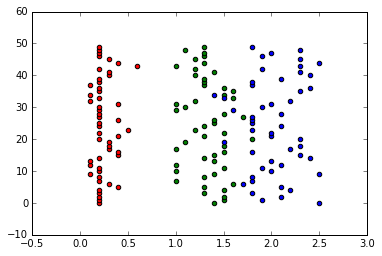

In [32]:
colors = ['r', 'g', 'b']
for ix_class in range(len(target_names)):
    mask_class = (targets == ix_class)
    plt.scatter(features[mask_class,ix_dim],
                range(len(features[mask_class,ix_dim])),
                c = colors[ix_class])
plt.show()

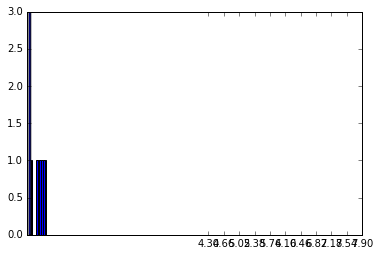

In [10]:
hist1,bin_edges = np.histogram(features[:,0].T, density=True)
plt.hist(hist1,)
plt.xticks(bin_edges)
plt.show()

## Plots

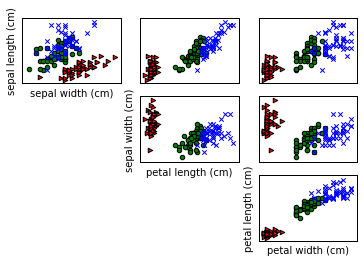

In [11]:
def pairs(features, feature_names, class_labels, class_colors, class_markers):
    N = features.shape[1]
    for ix in range(N-1):
        for jx in range(ix+1, N):
            plt.subplot(N-1, N-1, ix*(N-1)+jx)
            if(jx==(ix+1)):
                plt.ylabel(feature_names[ix])
                plt.xlabel(feature_names[jx])
            for ix_class in range(len(class_colors)):
                mask = (targets==ix_class)
                plt.scatter(features[mask,jx], features[mask,ix],
                            marker=class_markers[ix_class],
                            c=class_colors[ix_class])
            plt.autoscale(tight=True)
            turn_off_ticks('both')
pairs(features, feature_names,  targets, ['r','g','b'], ['>','o','x'])

With:

1. Samples $x_1 \dots x_n$
1. Desired outputs $y_1 \dots y_n, y \in \{-1, 1\}$
1. Initial weights $w_{1,1} \dots w_{n,1}$ set to $\frac{1}{n}$
1. Error function $E(f(x), y, i) = e^{-y_i f(x_i)}$
1. Weak learners $h\colon x \rightarrow [-1, 1]$
1. For $t \in 1 \dots T$:
   1. Choose $h_t(x)$:  
      Find weak learner $h_t(x)$ that minimizes $\epsilon_t$, the weighted sum error for misclassified points $\epsilon_t = \sum_i w_{i,t}E(h_t(x), y, i)$ 
   1. Choose $\alpha_t = \frac{1}{2} \ln \left(\frac{1-\epsilon_t}{\epsilon_t}\right)$
   1. Add to ensemble:  
      $F_t(x) = F_{t-1}(x) + \alpha_t h_t(x)$
   1. Update weights:   
      $w_{i,t+1} = w_{i,t} e^{-y_i \alpha_t h_t(x_i)}$ for all i
   1. Renormalize $w_{i,t+1}$ such that $\sum_i w_{i,t+1} = 1$
   

(Note: It can be shown that 
$$
\frac
{\sum_{h_{t+1}(x_i) = y_i} w_{i,t+1}}
{\sum_{h_{t+1}(x_i) \neq y_i} w_{i,t+1}}
= 
\frac
{\sum_{h_t(x_i) = y_i} w_{i,t}}
{\sum_{h_t(x_i) \neq y_i} w_{i,t}}
$$
at every step, which can simplify the calculation of the new weights.)

In [12]:
class Adabooster:
    def __init__(features, labels, T=10):
        self._features = features
        self._labels = labels
        self._T = T
        self._n = self._features.shape[0]
        self._dim = self._features.shape[1]
        self.set_weights()
        
    def set_weights(self):
        w_init = 1./self._n
        self._weights = [w_init for _ in range(self._n)]
        
    def adabooster(features, labels):
        pass
    